In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from random import random as rand

## useful functions, just for research

In [2]:
def hist(y):
    y = np.array(y)
    x = y[~np.isnan(y)]
    
    for q in np.arange(0, 10, 1):
        print(f"{q / 10}: {round(np.quantile(x, q / 10), 3)}")
    
    plt.figure(figsize=(5, 3))
    
    plt.hist(x)

# Data

In [3]:
d = pd.read_csv("data/odds_api_soccer_russia_premier_league2021-10-16.csv")

In [4]:
d.head()

,Date Updated,Time,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw
0,2021-10-16T02:46:51Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sportsbet,9.00,1.30,5.00
1,2021-10-16T02:44:36Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,bovada,8.00,1.34,5.00
2,2021-10-16T02:46:54Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,onexbet,11.00,1.35,5.35
3,2021-10-16T02:45:37Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,betclic,7.85,1.35,5.00
4,2021-10-16T02:46:53Z,03:47:26 Moscow Time,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,paddypower,8.50,1.29,5.00


## preprocessing 

In [5]:
# converting odds to probabilities

d.moneyline_home = 1 / d.moneyline_home
d.moneyline_away = 1 / d.moneyline_away
d.moneyline_draw = 1 / d.moneyline_draw


d["du"] = pd.to_datetime(d["Date Updated"])
d["t"] = d.Time.apply(lambda x: x.split(" Moscow Time")[0])
d.drop(["Date Updated", "Time"], axis=1, inplace=True)

d.Date = pd.to_datetime(d.Date)

d = d[list(d.columns[-2:]) + list(d.columns[:-2])]

d.sort_values("du", inplace=True)

d["m"] = d.du.values.astype('<M8[m]')

# EDA 

samples in minute

0.0: 1.0
0.1: 2.0
0.2: 2.0
0.3: 2.0
0.4: 3.0
0.5: 3.0
0.6: 3.0
0.7: 3.0
0.8: 4.0
0.9: 6.0


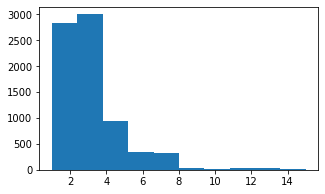

In [6]:
hist(d.groupby(["MarketName", "Bookmaker", "m"]).size())

markets

In [7]:
list(d.groupby("MarketName").groups.keys())

['Arsenal Tula/Zenit St Petersburg',
 'FK Sochi/FK Rostov',
 'Rubin Kazan/Lokomotiv Moscow',
 'Spartak Moscow/Dinamo Moscow']

bookmakers

In [8]:
np.unique(d.Bookmaker)

array(['barstool', 'betclic', 'betfair', 'betrivers', 'betus', 'bovada',
       'coral', 'draftkings', 'gtbets', 'intertops', 'ladbrokes',
       'marathonbet', 'matchbook', 'mybookieag', 'neds', 'onexbet',
       'paddypower', 'pinnacle', 'playup', 'skybet', 'sport888',
       'sportsbet', 'sugarhouse', 'tab', 'twinspires', 'unibet',
       'williamhill', 'wynnbet'], dtype=object)

# Bets for particular market, "Arsenal Tula/Zenit St Petersburg"

In [9]:
a = d[d.MarketName == "Arsenal Tula/Zenit St Petersburg"]

In [10]:
a.head()

,du,t,Date,URL,MarketName,Bookmaker,moneyline_home,moneyline_away,moneyline_draw,m
19,2021-10-16 02:40:36+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,intertops,0.125000,0.751880,0.217391,2021-10-16 02:40:00
21,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,playup,0.114943,0.769231,0.204082,2021-10-16 02:41:00
20,2021-10-16 02:41:15+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,tab,0.133333,0.740741,0.210526,2021-10-16 02:41:00
13,2021-10-16 02:41:17+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,sport888,0.133333,0.757576,0.212766,2021-10-16 02:41:00
15,2021-10-16 02:42:52+00:00,03:47:26,2021-10-16,NaN,Arsenal Tula/Zenit St Petersburg,unibet,0.125000,0.740741,0.208333,2021-10-16 02:42:00


In [11]:
ap = a.groupby(["Bookmaker", "m"]).mean().reset_index().sort_values("m")
ap["ts"] = ap.m.astype(int)

In [12]:
ap.head()

,Bookmaker,m,URL,moneyline_home,moneyline_away,moneyline_draw,ts
1557,intertops,2021-10-16 02:40:00,NaN,0.125000,0.751880,0.217391,1634352000000000000
2727,playup,2021-10-16 02:41:00,NaN,0.114943,0.769231,0.204082,1634352060000000000
2983,sport888,2021-10-16 02:41:00,NaN,0.133333,0.757576,0.212766,1634352060000000000
3447,tab,2021-10-16 02:41:00,NaN,0.133333,0.740741,0.210526,1634352060000000000
1682,ladbrokes,2021-10-16 02:42:00,NaN,0.125000,0.751880,0.222222,1634352120000000000


In [13]:
data = ap[["ts", "Bookmaker", "moneyline_home", "moneyline_away"]].to_numpy()

def calculate_average_bookies(col=2):
    kbooks = {}

    res = []

    last_ts = -1
    csum = 0.0

    for i in range(len(data)):
        ts = data[i][0]
        book = data[i][1]
        v = data[i][col]

        if last_ts != -1 and ts != last_ts:
            res.append([last_ts, csum / len(kbooks)])

        if book in kbooks:
            csum -= kbooks[book]

        kbooks[book] = v
        csum += v

        last_ts = ts
        
    return np.array(res)

In [14]:
mh = calculate_average_bookies(2)
ma = calculate_average_bookies(3)

bavg = pd.DataFrame(data=mh, columns=["t", "money_home"])

bavg.t = pd.to_datetime(bavg.t, unit='ns')
bavg.t = bavg.t.dt.tz_localize('UTC')

bavg["du"] = bavg.t
bavg["money_away"] = ma[:, 1]

In [15]:
bavg.head()

,t,money_home,du,money_away
0,2021-10-16 02:40:00+00:00,0.125000,2021-10-16 02:40:00+00:00,0.751880
1,2021-10-16 02:41:00+00:00,0.126652,2021-10-16 02:41:00+00:00,0.754857
2,2021-10-16 02:42:00+00:00,0.126102,2021-10-16 02:42:00+00:00,0.752008
3,2021-10-16 02:44:00+00:00,0.121481,2021-10-16 02:44:00+00:00,0.756523
4,2021-10-16 02:45:00+00:00,0.119019,2021-10-16 02:45:00+00:00,0.754166


In [16]:
bookmakers = np.unique(a.Bookmaker)

comment: 3 different 1 hour intervals and bets from all bookmakers

special attention to pinnacle: fat blue lines

average from all bookies: red and blue lines


method of calculation average: average probs from all bookies in each minute, weight is equal

In [17]:
def time_ind(x):
    return (start_time < x.du) & (x.du < end_time)

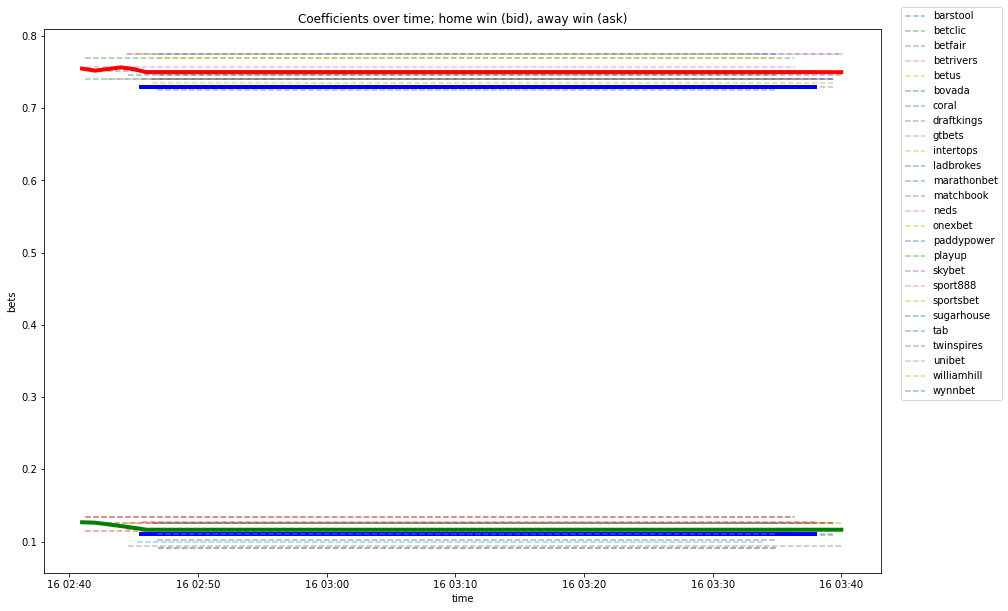

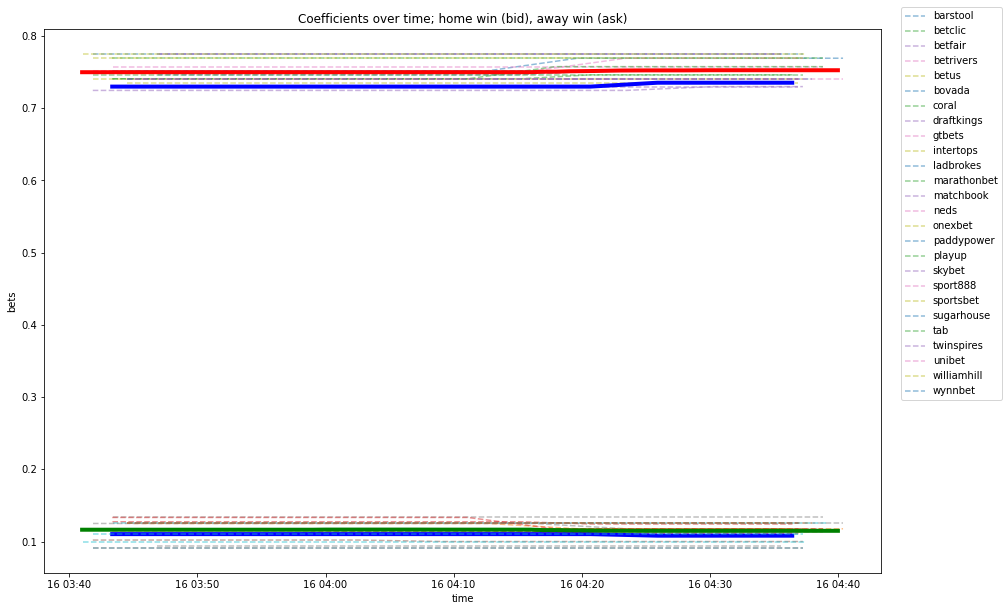

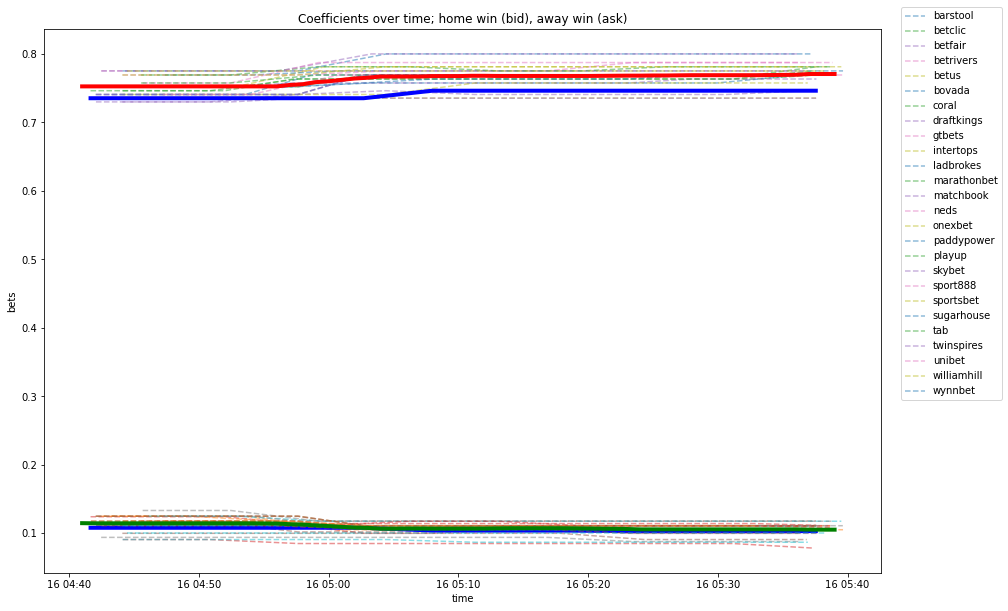

In [18]:
for offset in [0, 1, 2]:
    start_time = a.iloc[0].du + pd.Timedelta(hours=offset)
    end_time = a.iloc[0].du + pd.Timedelta(hours=(offset + 1))

    plt.figure(figsize=(15, 10))

    plt.title("Coefficients over time; home win (bid), away win (ask)")
    plt.ylabel("bets")
    plt.xlabel("time")

    alpha = 0.5

    for bookmaker in bookmakers:
        c = a[a.Bookmaker == bookmaker]

        ind = time_ind(c)

        if bookmaker != "pinnacle":
            plt.plot(c.du[ind], c.moneyline_away[ind], linestyle="dashed", alpha=alpha, label=bookmaker)
            plt.plot(c.du[ind], c.moneyline_home[ind], linestyle="dashed", alpha=alpha)
        else:
            plt.plot(c.du[ind], c.moneyline_away[ind], c="b", linewidth=4)
            plt.plot(c.du[ind], c.moneyline_home[ind], c="b", linewidth=4)


    ind = time_ind(bavg)
    plt.plot(bavg.du[ind], bavg.money_away[ind], c="r", linewidth=4)
    plt.plot(bavg.du[ind], bavg.money_home[ind], c="g", linewidth=4)

    plt.legend(bbox_to_anchor=(1.15, 1.05))

    plt.show()

bets for whole period

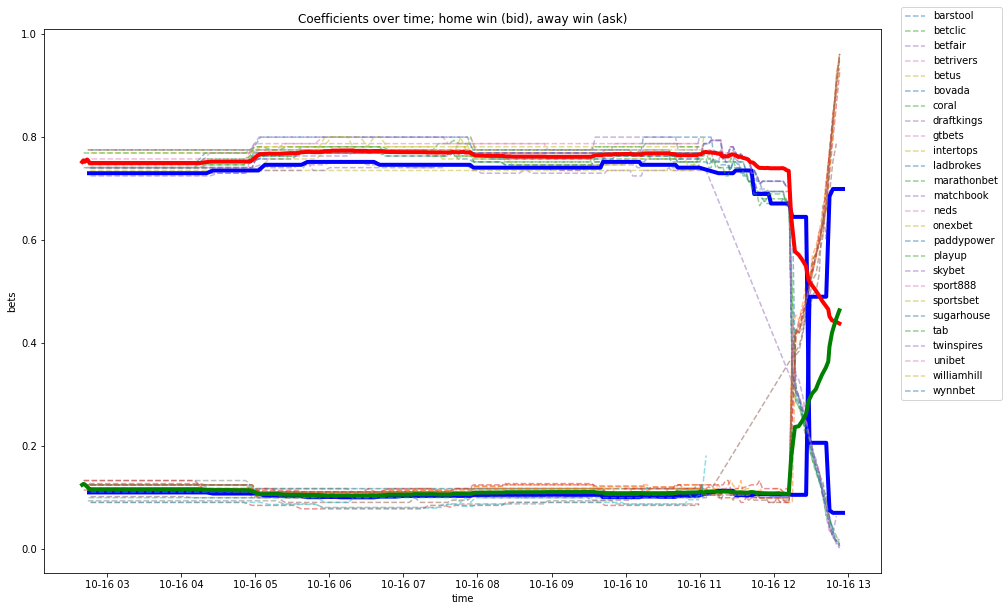

In [19]:
plt.figure(figsize=(15, 10))

plt.title("Coefficients over time; home win (bid), away win (ask)")
plt.ylabel("bets")
plt.xlabel("time")

alpha = 0.5

for bookmaker in bookmakers:
    c = a[a.Bookmaker == bookmaker]

    ind = time_ind(c)

    if bookmaker != "pinnacle":
        plt.plot(c.du, c.moneyline_away, linestyle="dashed", alpha=alpha, label=bookmaker)
        plt.plot(c.du, c.moneyline_home, linestyle="dashed", alpha=alpha)
    else:
        plt.plot(c.du, c.moneyline_away, c="b", linewidth=4)
        plt.plot(c.du, c.moneyline_home, c="b", linewidth=4)

        
plt.plot(bavg.du, bavg.money_away, c="r", linewidth=4)
plt.plot(bavg.du, bavg.money_home, c="g", linewidth=4)

plt.legend(bbox_to_anchor=(1.15, 1.05))

plt.show()